# **PROCESAMIENTO DE LENGUAJE NATURAL**
## **spaCy**

* Es una librería de código abierto en python para el Procesamiento del Lenguaje Natural que posee modelos entrenados para varios idiomas, entre ellos el Español.


* Está pensada para funcionar en entornos productivos y es una librería con mejor rendimiento que **NLTK**.


* Dispone de una web y de una documentación muy buena, incluso se pueden ejecutar ciertos ejemplos en la propia web: https://spacy.io/


* Dispone también de un curso online (https://course.spacy.io/) bastante interesante.


* Entre otras cosas con ***spaCy*** podemos hacer:
    1. Tokenización
    2. Segmentación
    3. Lematización
    4. Detección de Stop Words
    5. Parts of Speech (PoS) Tagging
    6. Named Entity Recognition (NER)

* En particular para el Español ***spaCy*** tiene entrenados dos modelos (con Redes Neuronales Convolucionales según su documentación) de pequeño y mediano tamaño con los corpus de **AnCora** (http://clic.ub.edu/corpus/es/ancora) y **WikiNER** (https://sparknlp.org/2020/02/03/wikiner_6B_100_es.html)


* Estos dos modelos de pequeño y mediano tamaño los podemos encontrar en la web de ***spaCy*** (https://spacy.io/models/es) y son los siguiente:
    - es_core_news_md (93 MiB)
    - es_core_news_sm (35 MiB)


* ***spaCy*** hace uso de estos modelos y tienen que ser descargados, para ello debemos de abrir un terminal en python y ejecutar lo siguiente para descargar el modelo en Español.


```
>> python3 -m spacy download es_core_news_sm
```


In [1]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 71.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<hr>


### **Arquitectura de spaCy**:

* ***spaCy*** utiliza dos tipos de estructuras (objetos) llamados **Doc** y **Vocab**:

    - ***Doc***: Este objeto esta formado por una secuencia de Tokens (objetos de la clase ***Token***).

    - ***Vocab***: Este objeto posee un conjunto de Look-up tables (tablas de consulta) que hacen que la información común esté disponible en todos los documentos (Lemas, Stop Words, PoS, etc.).

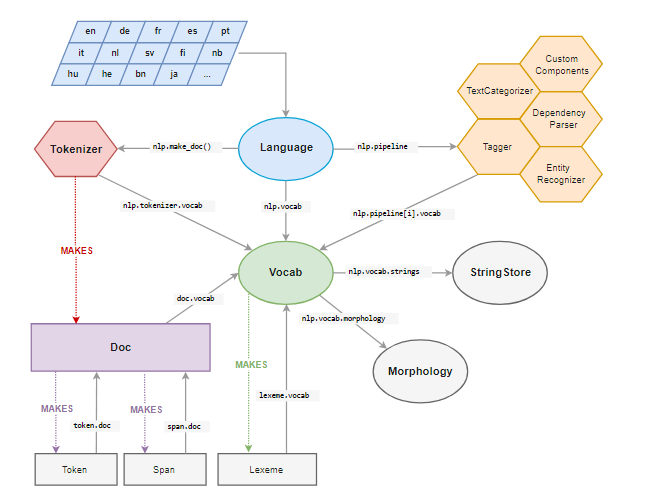

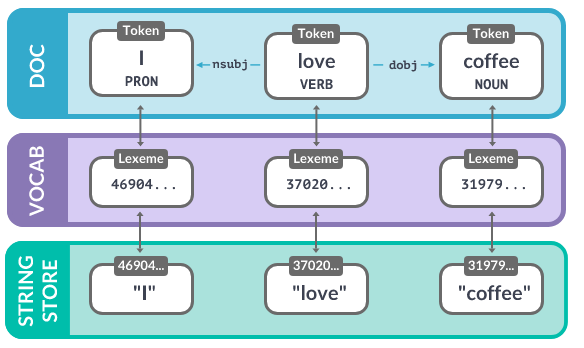


### **Funcionalidades en spaCy**
Una forma sencilla de trabajar con ***spaCy*** es:

    1. Cargar un modelo de lenguaje (por ejemplo el Español)
    2. Dado un texto plano, crear un objeto de la clase "Doc" y pasarle el texto plano. El texto ya quedará tokenizado dentro del objeto "Doc".
    3. Trabajar sobre las palabras del documento.

Ahora probaremos las funcionalidades que nos brinda esta librería:

#### **Tokenización**


In [2]:
# importamos la librería
import spacy

# cargamos el modelo de lenguaje
nlp = spacy.load('es_core_news_sm')

# creamos un documento y le pasamos un texto plano
doc = nlp("Los libros constituyen una fuente de conocimiento inagotable.")
print('Tipo de dato: ' + str(type(doc)))

# iteramos sobre el documento y mostramos las palabras
print([w.text for w in doc])

Tipo de dato: <class 'spacy.tokens.doc.Doc'>
['Los', 'libros', 'constituyen', 'una', 'fuente', 'de', 'conocimiento', 'inagotable', '.']


#### **- Segmentación**


* La ***segmentación*** divide las cadenas de texto en frases o párrafos.


* Para la segmentación en spaCy se debe usar un componente llamado "**sentencier**" que divide los textos por simbolos como puntos, interrogantes, etc.

In [3]:
# documento de prueba
doc = nlp("¿Qué es la vida? Un frenesí. ¿Qué es la vida? Una ilusión, una sombra, una ficción.")

# doc.sents separa el documento en oraciones.
# Con [s.text for s in doc.sents] se extrae el texto de cada oración.
print([s.text for s in doc.sents])

['¿Qué es la vida?', 'Un frenesí.', '¿Qué es la vida?', 'Una ilusión, una sombra, una ficción.']


#### **- Stemming**

* Funcionalidad no disponoble en spaCy

#### **- Lematización**

* ***spaCy*** hace una lematización muy buena en Español.


* Los objetos de la clase ***Token*** tienen la propiedad (o atributo) ***lemma_*** que nos devuelve el lema del token (o la palabra).

In [4]:
# Definir la cadena de texto de ejemplo
texto = "La única manera de hacer un gran trabajo es amar lo que haces."

# Procesar el texto con spaCy
doc = nlp(texto)

# Iterar sobre cada token en el documento procesado
for word in doc:
  print(word.text + ' --> ' + word.lemma_)

La --> el
única --> único
manera --> manera
de --> de
hacer --> hacer
un --> uno
gran --> gran
trabajo --> trabajo
es --> ser
amar --> amar
lo --> él
que --> que
haces --> haz
. --> .


#### **- Stop words**

* spaCy dispone de más de 500 stop words en Español.


* Veamos a continuación las Stop Words en Español.

In [5]:
# Cargar las stop words en español desde spaCy
stopwords = spacy.lang.es.stop_words.STOP_WORDS

# Imprimir el número de stop words
print('Número de stop words: ' + str(len(stopwords)))

# Imprimir la lista de stop words
print('Stop words: ' + str(list(stopwords)))

Número de stop words: 521
Stop words: ['cómo', 'las', 'alguno', 'poder', 'sobre', 'ademas', 'su', 'dicen', 'sera', 'somos', 'nueva', 'son', 'ningunos', 'te', 'supuesto', 'suyo', 'esas', 'menos', 'del', 'dia', 'estamos', 'cuántos', 'algo', 'siendo', 'propio', 'él', 'lado', 'cuándo', 'sola', 'aquéllas', 'mencionó', 'ocho', 'aún', 'tener', 'tercera', 'será', 'ciertas', 'míos', 'habrá', 'vuestro', 'es', 'además', 'poco', 'junto', 'tenido', 'algunos', 'donde', 'mismos', 'cuatro', 'mí', 'sean', 'he', 'tres', 'cuantas', 'bastante', 'buena', 'mal', 'podrian', 'no', 'entre', 'aproximadamente', 'estaba', 'ningún', 'aquello', 'último', 'está', 'estais', 'haber', 'veces', 'u', 'cierto', 'hubo', 'ella', 'haya', 'vosotros', 'través', 'esa', 'pues', 'si', 'tuvo', 'aqui', 'ello', 'nadie', 'siguiente', 'manifestó', 'posible', 'podemos', 'añadió', 'hacerlo', 'tenga', 'sus', 'era', 'estan', 'cuál', 'varios', 'entonces', 'doce', 'verdad', 'mías', 'otros', 'detras', 'soy', 'cualquier', 'ésta', 'ya', 'contr

* Los objetos de la clase ***Token*** tienen la propiedad ***is_stop*** que devuelve en Boolean indicando si el token es o no una stop word; es decir, si el ***Token*** (o palabra) esta dentro de la lista antes mostrada.


* Veamos a continuación como obtener las stop words de una frase con spaCy:

In [6]:
# Definir la cadena de texto de ejemplo
texto = "La realidad no es más que un producto de nuestros sueños."

# Procesar el texto con spaCy
doc = nlp(texto)

# Iterar sobre cada token en el documento procesado
for word in doc:
  if word.is_stop:
    print(word)


La
no
es
más
que
un
de
nuestros


#### **- Part of Speech (PoS) Tagging**

* En ***spaCy*** el PoS lo divide en 3 tipos de tags que son:
    1. **pos**: etiqueta simple de alto nivel (verbo, nombre, adjetivo, etc).
    2. **tag**: etiqueta con más nivel de detalle que el pos.
    3. **dep**: dependencia sintáctica para ver la relación entre tokens.


* Estos 3 tipos son propiedades de la clase ***Token***:

In [7]:
import pandas as pd
# Definir la cadena de texto de ejemplo
texto = "El hombre es dueño de lo que calla y esclavo de lo que habla."

# Procesar el texto con spaCy
doc = nlp(texto)

# Obtener información de POS, TAG y DEP para cada token en el texto
pos = [[tk.text, tk.pos_, tk.tag_, tk.dep_] for tk in doc]

# Crear un DataFrame de pandas con la información de los tokens
df = pd.DataFrame(pos, columns=["Text", "PoS", "TAG", "DEP"])

# Imprimir el DataFrame
print(df)

       Text    PoS    TAG    DEP
0        El    DET    DET    det
1    hombre   NOUN   NOUN  nsubj
2        es    AUX    AUX    cop
3     dueño   NOUN   NOUN   ROOT
4        de    ADP    ADP   mark
5        lo   PRON   PRON    det
6       que   PRON   PRON    obj
7     calla   VERB   VERB    acl
8         y  CCONJ  CCONJ     cc
9   esclavo    ADJ    ADJ   conj
10       de    ADP    ADP   mark
11       lo   PRON   PRON    det
12      que   PRON   PRON    obj
13    habla   VERB   VERB    acl
14        .  PUNCT  PUNCT  punct


Interpretación de la segunda línea del resultado:

* Text: "hombre"

* PoS (Part of Speech): "NOUN" (Sustantivo)

* TAG: "NOUN" (Sustantivo)

* DEP (Dependency): "nsubj" (Sujeto nominal)

El token "hombre" es un sustantivo (NOUN) y se encuentra en la relación de dependencia "nsubj" como el sujeto nominal de la oración

#### **- Named Entity Recognition (NER)**


In [9]:
# Definir la cadena de texto de ejemplo
texto = "Mario Vargas Llosa, galardonado con el Premio Nobel de Literatura en 2010, nació en Arequipa, Perú, y su novel"

# Procesar el texto con spaCy
doc = nlp(texto)

# Iterar sobre cada entidad reconocida en el texto
for entity in doc.ents:
  # Imprimir el texto de la entidad, su etiqueta y una explicación de la etiqueta
  print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

Mario Vargas Llosa - PER - Named person or family.
Premio Nobel de Literatura - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Arequipa - LOC - Non-GPE locations, mountain ranges, bodies of water
Perú - LOC - Non-GPE locations, mountain ranges, bodies of water



<hr>


### **Resumen**

* Una vez creado el documento a partir del texto plano, tenemos ese texto tokenizado.


* Los objetos de la clase ***Token*** tienen una serie de propiedades que permiten obtener mucha información relativa a los tokens (o palabras).


* Haciendo un resumen de lo visto anteriormente podemos obtener la siguiente información de las palabras de un texto:

In [ ]:
import spacy
import pandas as pd

# Definir el texto de ejemplo
texto = "spaCy es una biblioteca de NLP de código abierto de Explosion AI. Fue creado en 2015 por Matthew Honnibal."

# Procesar el texto con spaCy
doc = nlp(texto)

# Obtener información de cada token en el texto
result = [[tk.text, tk.lemma_, tk.pos_, tk.tag_, tk.dep_, tk.shape_, tk.is_alpha, tk.is_stop] for tk in doc]

# Crear un DataFrame de pandas con la información de los tokens
df = pd.DataFrame(result, columns=["Text", "Lema", "PoS", "TAG", "DEP", "Shape", "Alpha", "is Stop word"])

# Imprimir el DataFrame
print(df)

El resultado que corresponde al primer token en el texto procesado:

* Text (Texto): "spaCy"
* Lema: "spacy"
* PoS (Part of Speech) (Parte del discurso): "VERB" (Verbo)
* TAG: "VERB" (Verbo)
* DEP (Dependency) (Dependencia): "csubj" (Sujeto clausal)
* Shape (Forma): "xxxXx" (El token consiste en letras minúsculas y una letra mayúscula)
* Alpha (Alfabético): True (El token contiene caracteres alfabéticos)
* is Stop word (Es palabra vacía): False (El token no es una palabra vacía)

#### Para más información visitar el siguiente enlace: https://spacy.io/usage/spacy-101#annotations